In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization


df = pd.read_csv('data/cleaned_2018_flights.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534417 entries, 0 to 9534416
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   ItinID             int64  
 2   MktID              int64  
 3   MktCoupons         int64  
 4   Quarter            int64  
 5   Origin             object 
 6   OriginWac          int64  
 7   Dest               object 
 8   DestWac            int64  
 9   Miles              float64
 10  ContiguousUSA      int64  
 11  NumTicketsOrdered  float64
 12  AirlineCompany     object 
 13  PricePerTicket     float64
dtypes: float64(3), int64(8), object(3)
memory usage: 1018.4+ MB


In [2]:
df.head(20)

,Unnamed: 0,ItinID,MktID,MktCoupons,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
0,0,20181767585,2018176758501,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,672.87
1,1,20181767586,2018176758601,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,367.68
2,2,20181767587,2018176758701,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,417.94
3,3,20181767636,2018176763601,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,247.10
4,4,20181767637,2018176763701,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,276.35
5,5,20181767637,2018176763702,1,1,LAX,91,ORD,41,1744.0,2,1.0,AA,200.65
6,6,20181767638,2018176763801,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,560.96
7,7,20181767639,2018176763901,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,326.98
8,8,20181767640,2018176764001,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,389.90
9,9,20181767641,2018176764101,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,444.06


In [105]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9101945 entries, 676132 to 1375908
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   ItinID             int64  
 2   MktID              int64  
 3   MktCoupons         int64  
 4   Quarter            int64  
 5   Origin             object 
 6   OriginWac          int64  
 7   Dest               object 
 8   DestWac            int64  
 9   Miles              float64
 10  ContiguousUSA      int64  
 11  NumTicketsOrdered  float64
 12  AirlineCompany     object 
 13  PricePerTicket     float64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.3+ GB


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Miles', ylabel='PricePerTicket'>

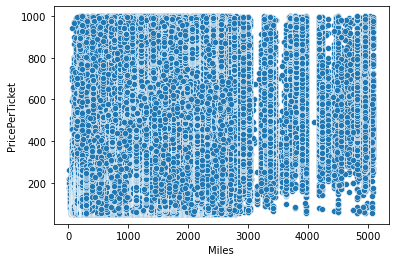

In [4]:
sns.scatterplot(data=df, x='Miles', y='PricePerTicket')

C:\Users\tlfd201\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumTicketsOrdered', ylabel='Density'>

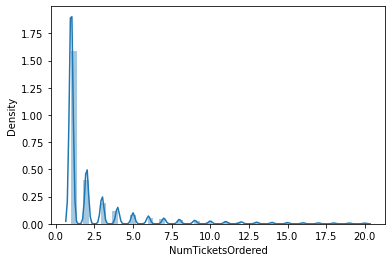

In [116]:

sns.distplot(df['NumTicketsOrdered'])

<AxesSubplot:xlabel='PricePerTicket', ylabel='Count'>

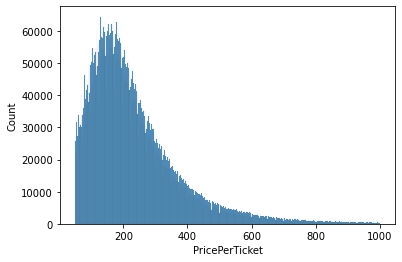

In [5]:
sns.histplot(data=df, x='PricePerTicket')

<AxesSubplot:xlabel='PricePerTicket', ylabel='Count'>

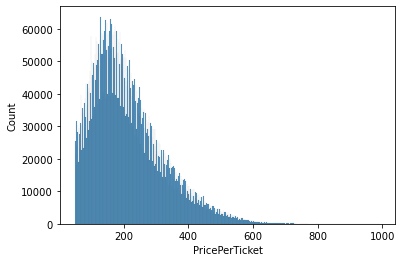

In [104]:
sns.histplot(data=filtered_df, x='PricePerTicket')

<AxesSubplot:xlabel='PricePerTicket', ylabel='Count'>

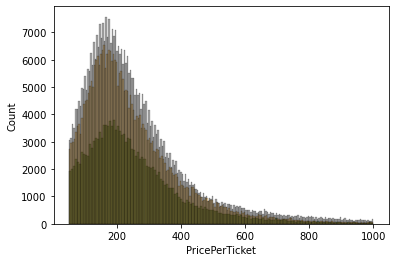

In [6]:
#plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Origin']=='PHL'], x='PricePerTicket', color = 'green', alpha = 0.35, label = 'PHL')
sns.histplot(data=df[df['Origin']=='ORD'], x='PricePerTicket', color = 'orange', alpha = 0.35, label = 'ORD')
sns.histplot(data=df[df['Origin']=='LAX'], x='PricePerTicket', color = 'black', alpha = 0.35, label = 'LAX')
#plt.legend()

In [7]:
#not normal distr. positive skew
Q1 = df['PricePerTicket'].quantile(0.25)
Q3 = df['PricePerTicket'].quantile(0.75)
IQR = Q3 - Q1
IQR

156.09

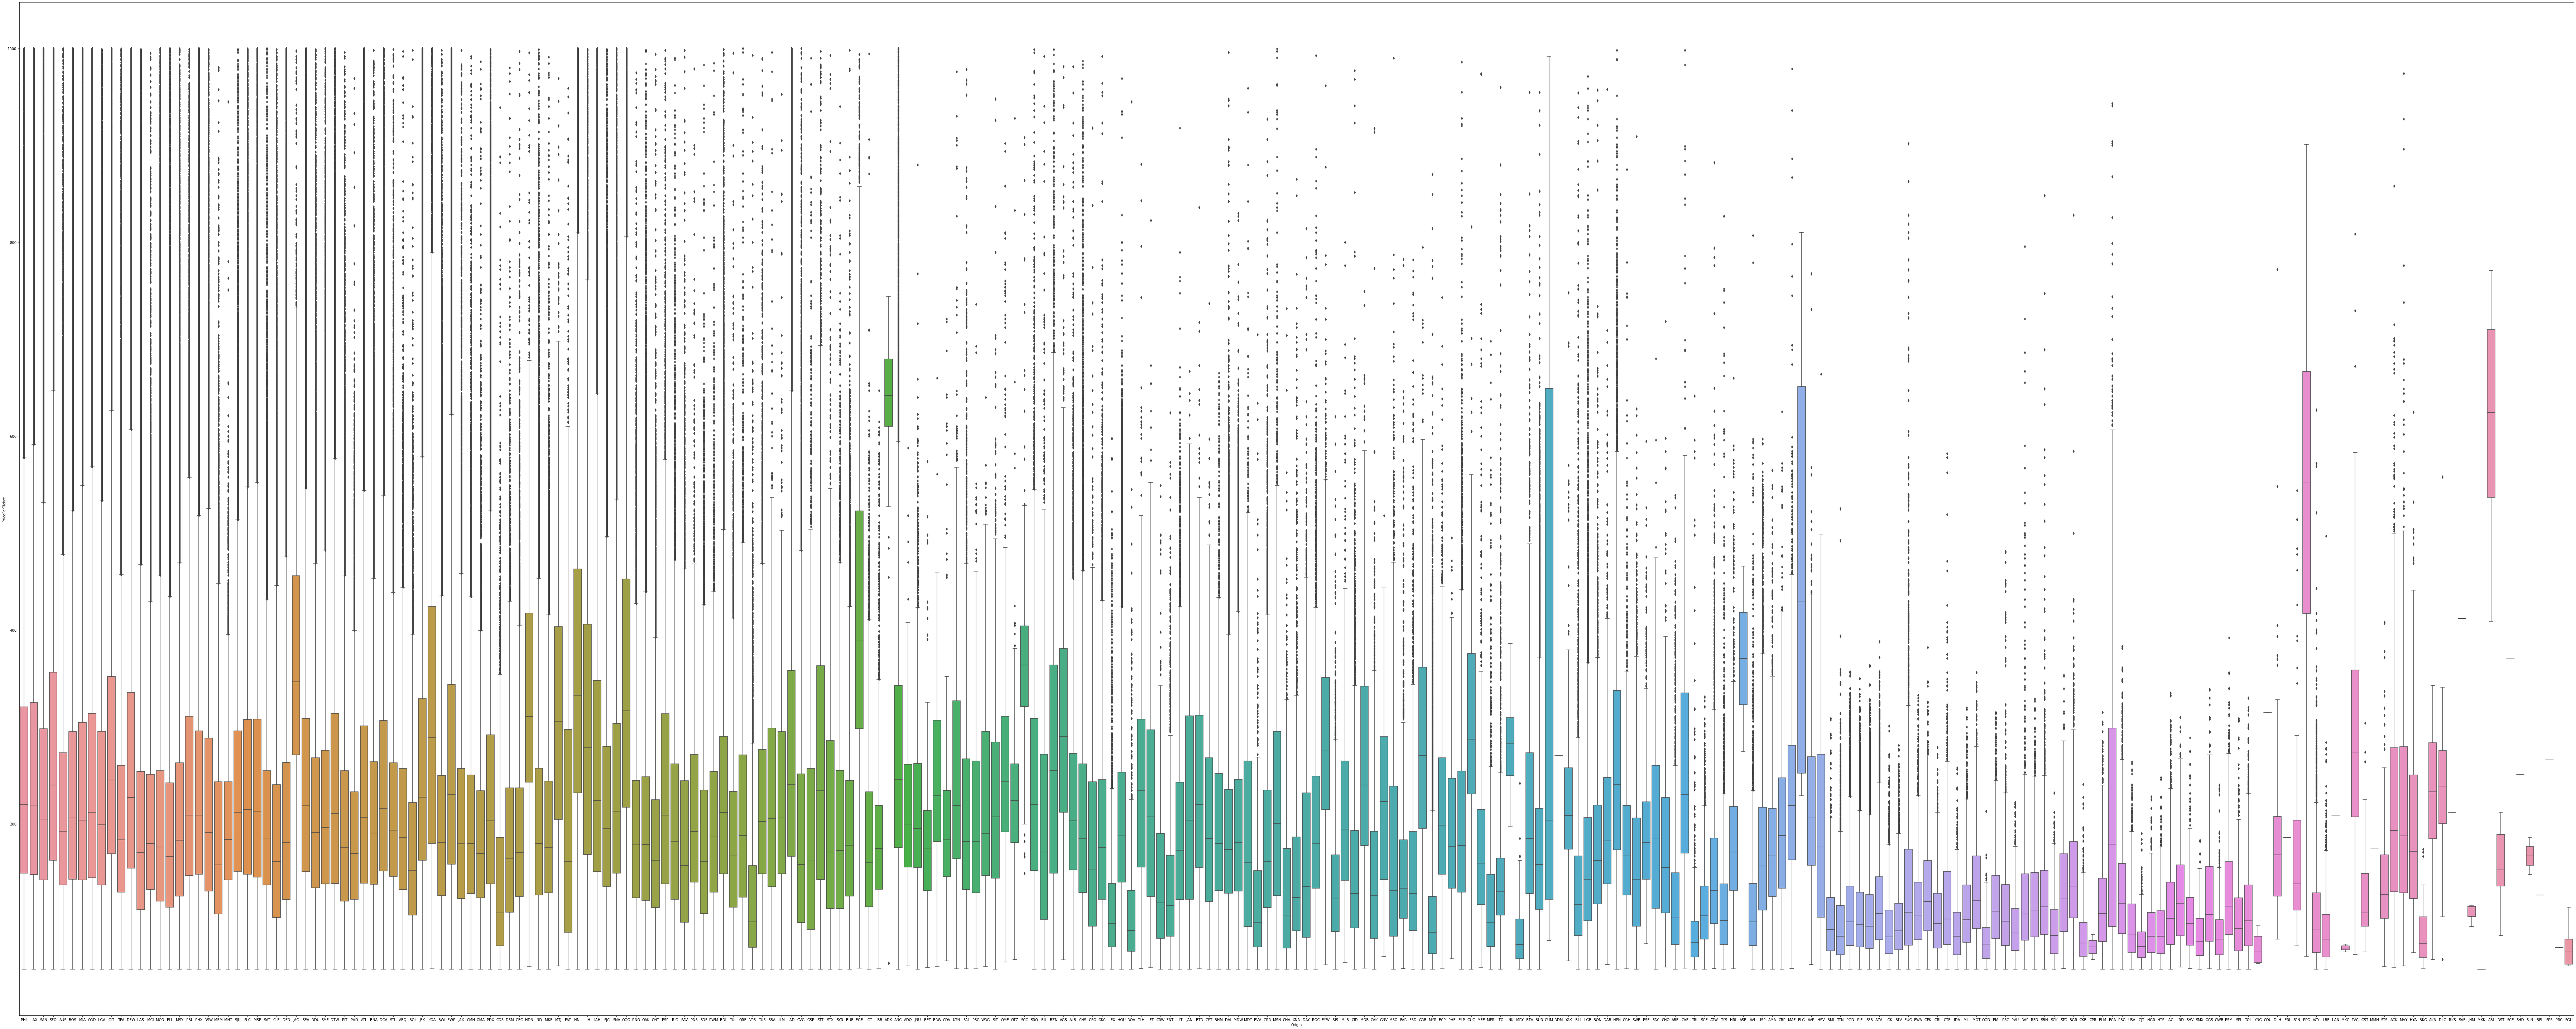

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 40))
ax = sns.boxplot(data=df, x='Origin', y='PricePerTicket')
plt.tight_layout()
plt.savefig('origin_box', dpi = 400, bbox_inches='tight')
#too much

<AxesSubplot:xlabel='Miles', ylabel='Count'>

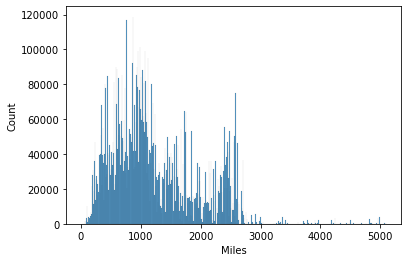

In [9]:
sns.histplot(data=df, x='Miles')

<AxesSubplot:xlabel='AirlineCompany', ylabel='PricePerTicket'>

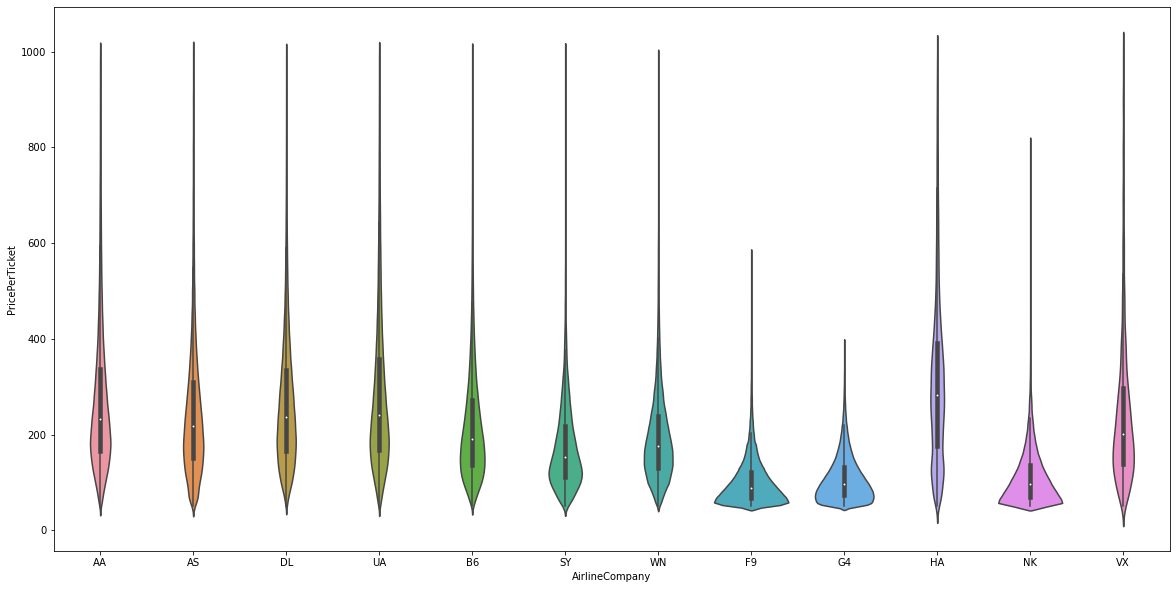

In [12]:
plt.figure(figsize=(20, 10))

sns.violinplot(x ="AirlineCompany", 
             y ="PricePerTicket", 
             data = df)

<AxesSubplot:xlabel='Quarter', ylabel='PricePerTicket'>

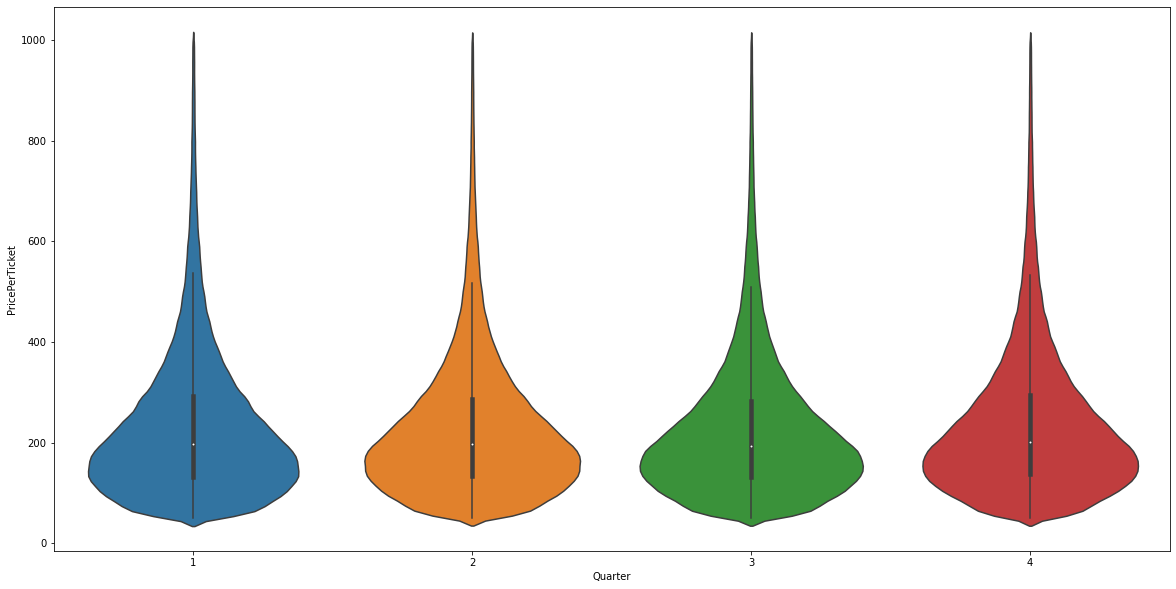

In [13]:
plt.figure(figsize=(20, 10))

sns.violinplot(x ="Quarter", 
             y ="PricePerTicket", 
             data = df)

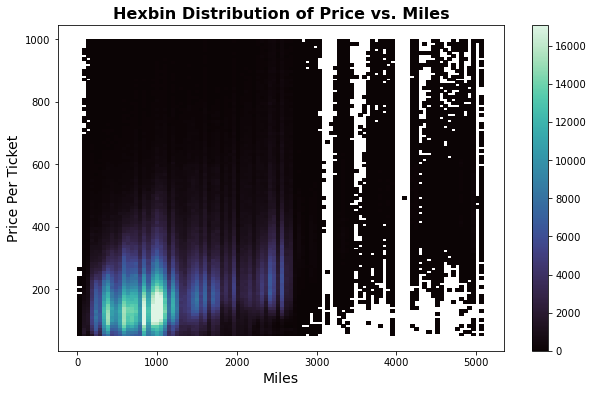

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Miles', y='PricePerTicket', bins=100, pmax=0.95, cmap='mako', cbar=True, vmin=0)
plt.title('Hexbin Distribution of Price vs. Miles', fontsize=16, fontweight='bold')
plt.xlabel('Miles', fontsize=14)
plt.ylabel('Price Per Ticket', fontsize=14)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Quarter', 'NumTicketsOrdered']]  # Add more features if available
y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

Mean Squared Error: 15735.217303100613


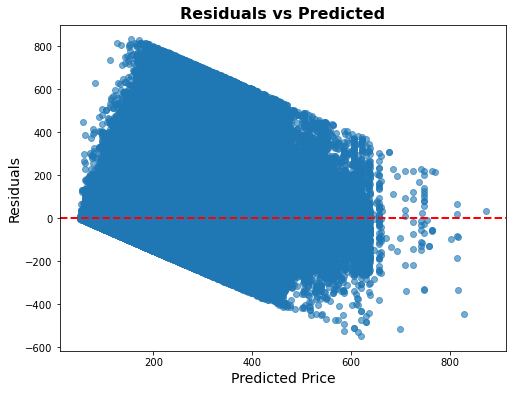

In [24]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

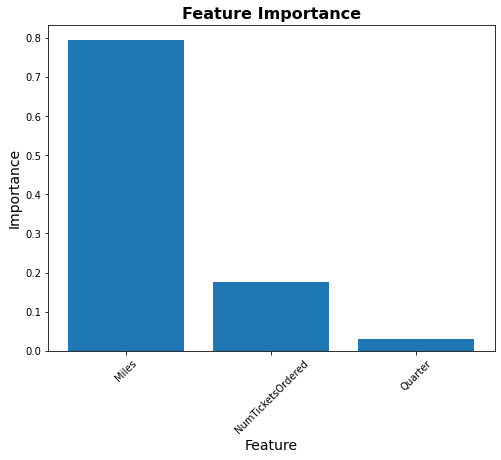

In [25]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [26]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', marker='o')
plt.title('Learning Curve', fontsize=16, fontweight='bold')
plt.xlabel('Training Size', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend()
plt.show()

KeyboardInterrupt: 

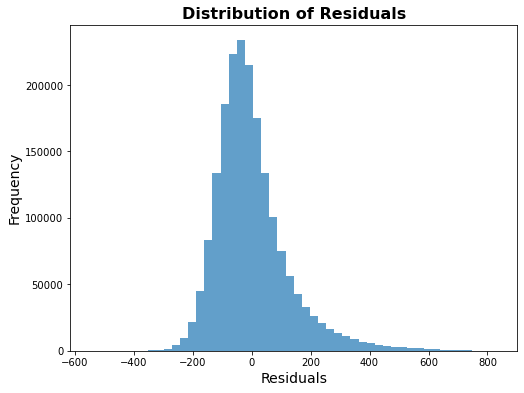

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

X = df[['Miles', 'Quarter', 'NumTicketsOrdered', 'Origin']]  # Add more features if available
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-31-261028c6a6ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


Mean Squared Error: 15153.570127355155


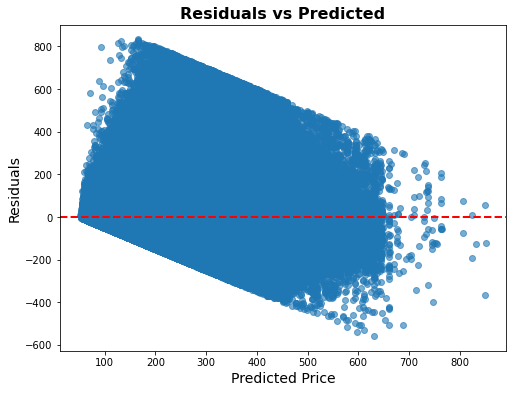

In [32]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

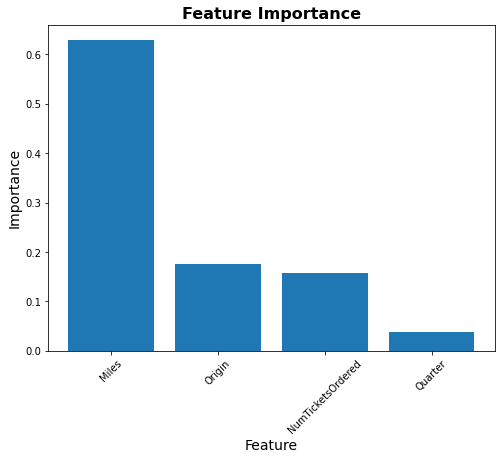

In [33]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

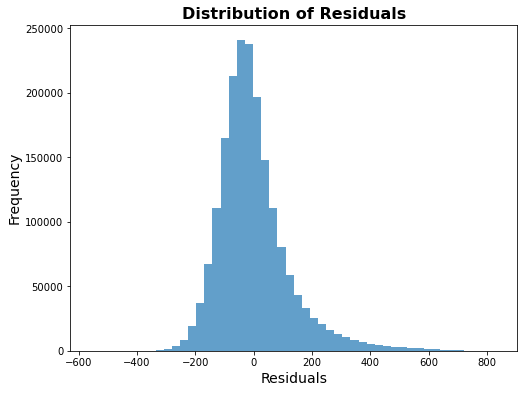

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Quarter', 'NumTicketsOrdered', 'Dest']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-37-60c3969d7207>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])


Mean Squared Error: 15152.545493981166


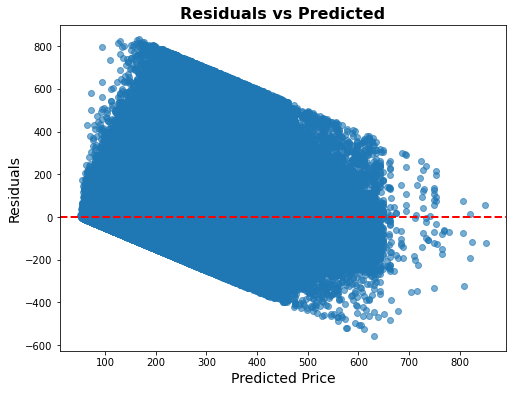

In [40]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

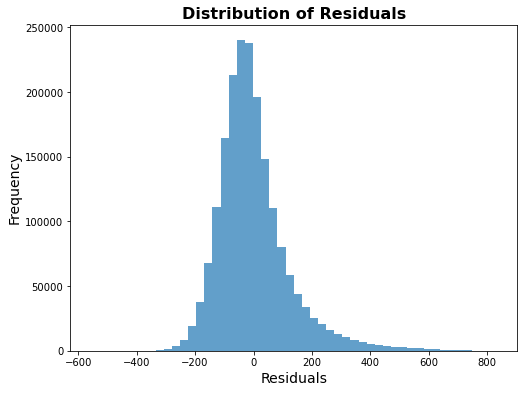

In [41]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [ ]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Quarter', 'NumTicketsOrdered', 'Origin', 'Dest']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-43-d444646ae15c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-43-d444646ae15c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


Mean Squared Error: 15127.864385641571


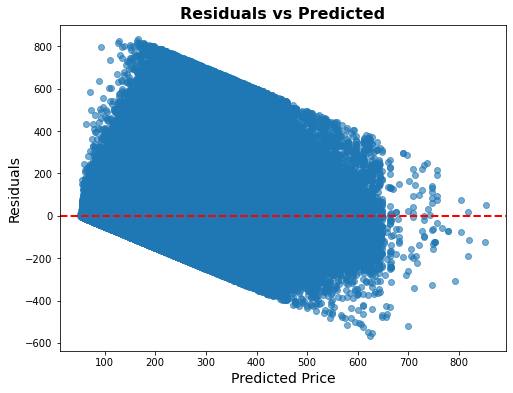

In [44]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

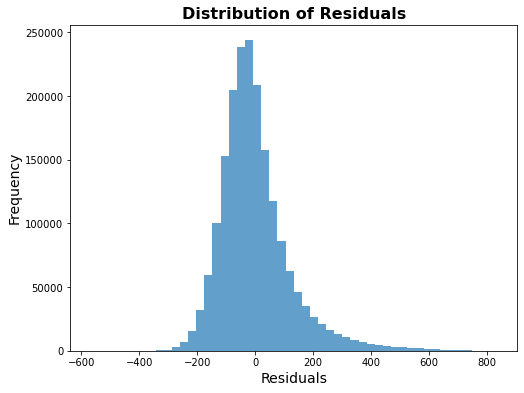

In [45]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

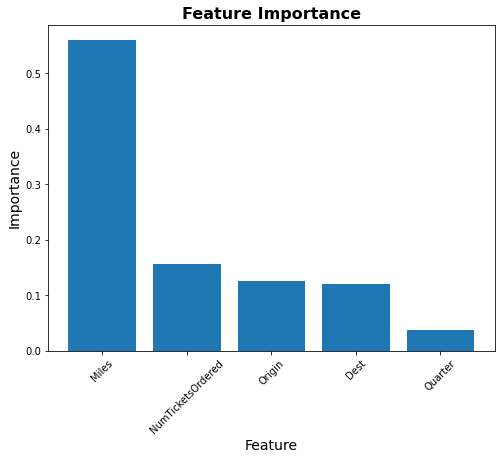

In [46]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Quarter', 'Origin', 'Dest']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-47-fc86da01e5d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-47-fc86da01e5d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


Mean Squared Error: 15748.165582794109


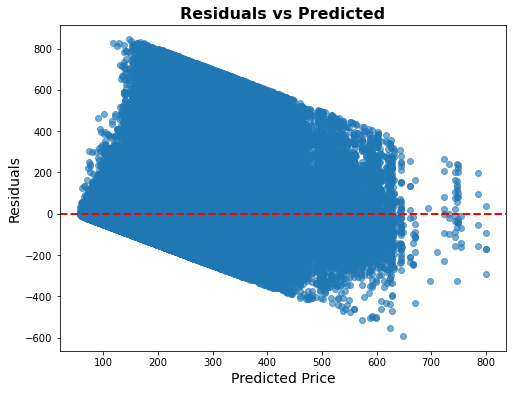

In [48]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

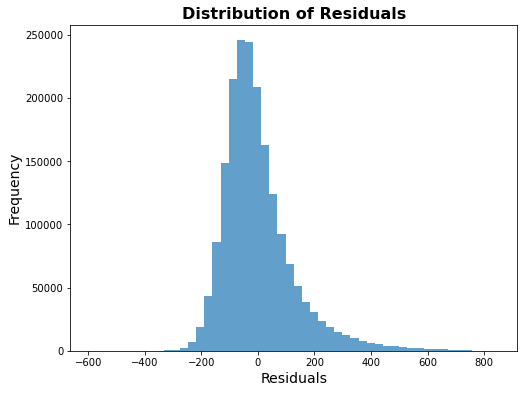

In [49]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

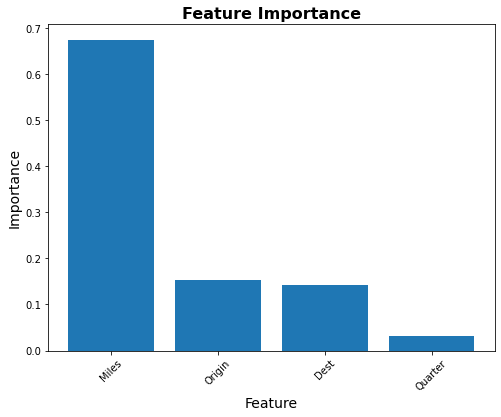

In [50]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Quarter', 'Origin', 'Dest', 'ContiguousUSA', 'DestWac', 'AirlineCompany']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-56-042617749bc4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-56-042617749bc4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
<ipython-input-56-042617749bc4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Mean Squared Error: 14439.19800942936


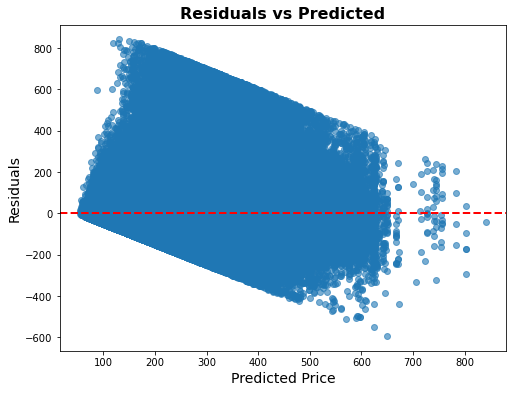

In [57]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

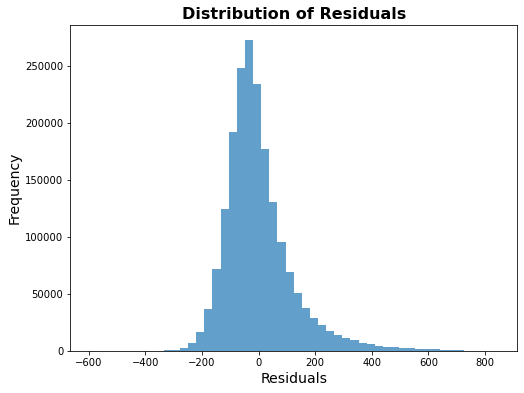

In [58]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

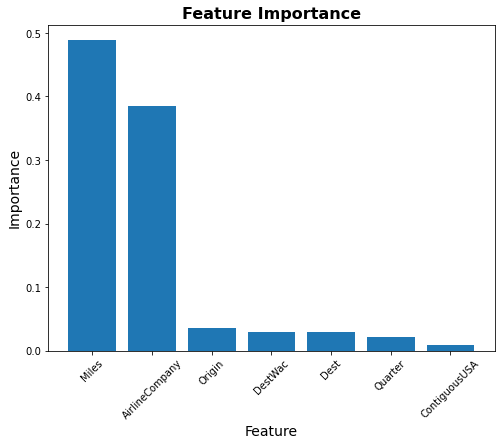

In [59]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Quarter', 'Origin', 'Dest', 'ContiguousUSA', 'DestWac', 'AirlineCompany', 'MktCoupons']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-60-6c75ba5a45a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-60-6c75ba5a45a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
<ipython-input-60-6c75ba5a45a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Mean Squared Error: 14438.31201336323


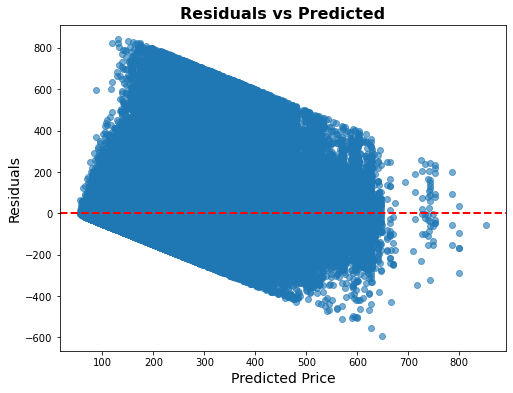

In [61]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

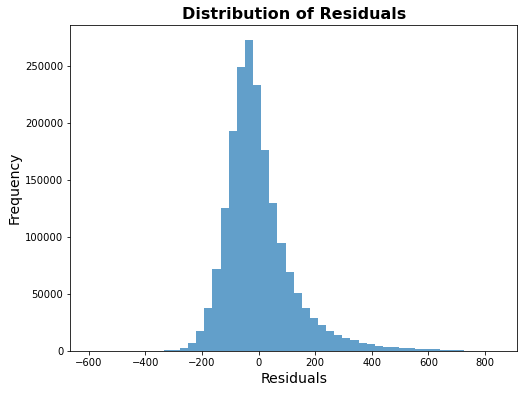

In [62]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

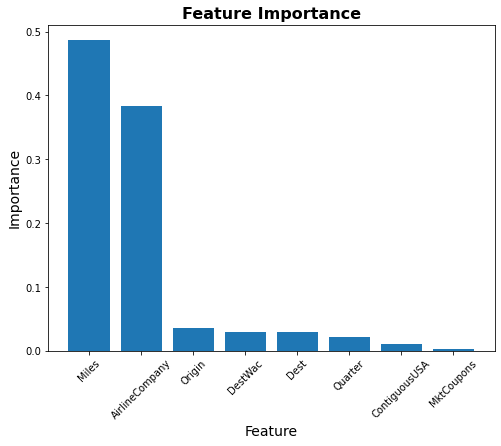

In [63]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Origin', 'DestWac', 'AirlineCompany']]  # Add more features if available
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-64-185622951b63>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
<ipython-input-64-185622951b63>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


Mean Squared Error: 14540.624066746546


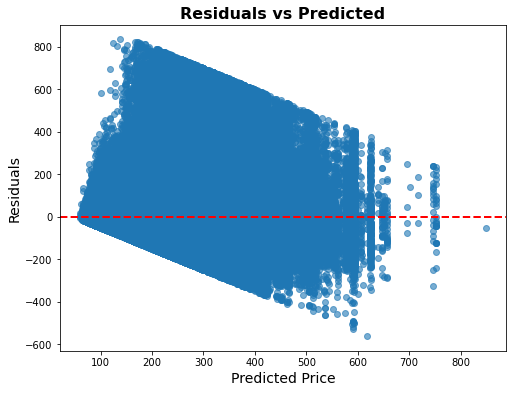

In [65]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

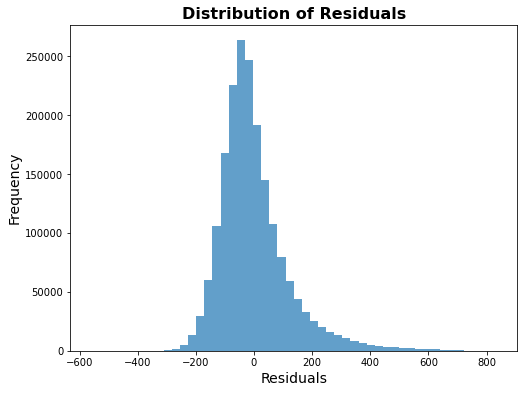

In [66]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

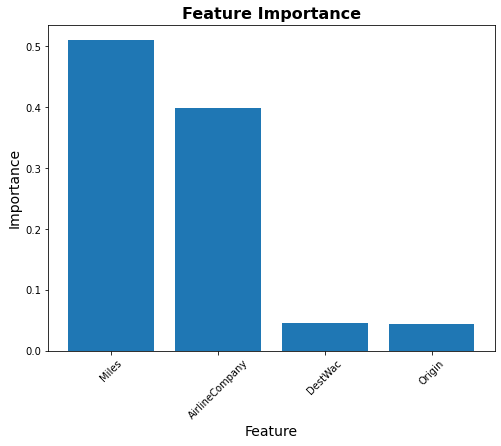

In [67]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'AirlineCompany']]  # Add more features if available

X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-68-a41ca2c9c272>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


Mean Squared Error: 14627.785563134967


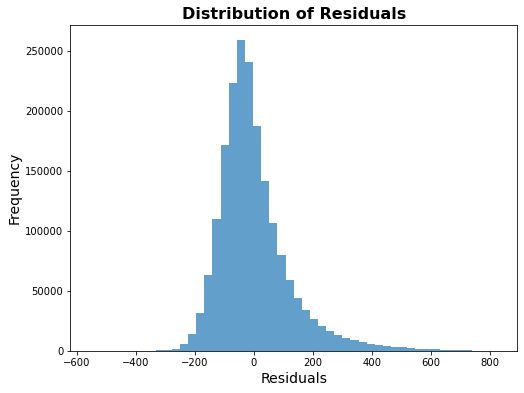

In [70]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

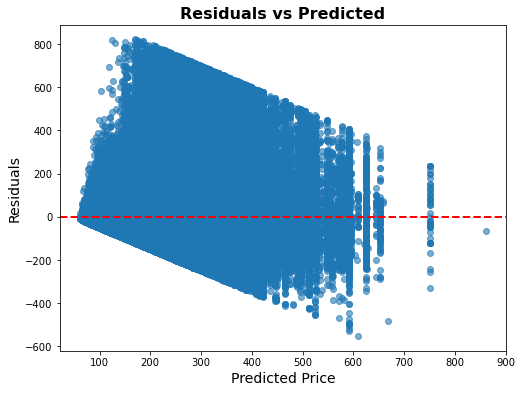

In [69]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

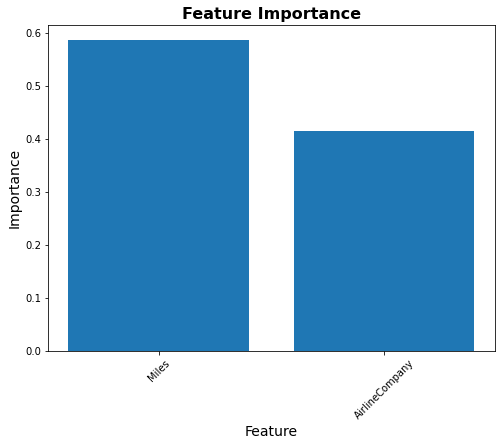

In [71]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor

# Feature selection and preprocessing
X = df[['Miles', 'AirlineCompany']]  # Add more features if available
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])

y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-74-a62158a02024>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


Mean Squared Error: 15616.943067694474


In [73]:
!pip install xgboost

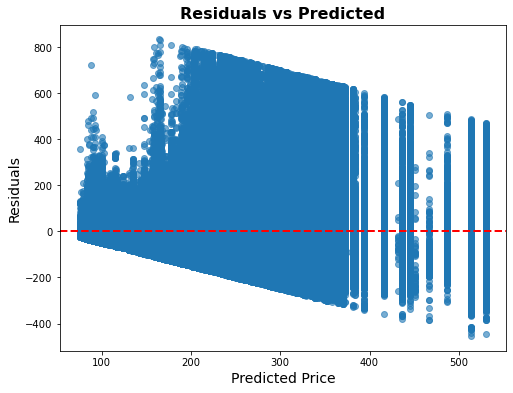

In [75]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

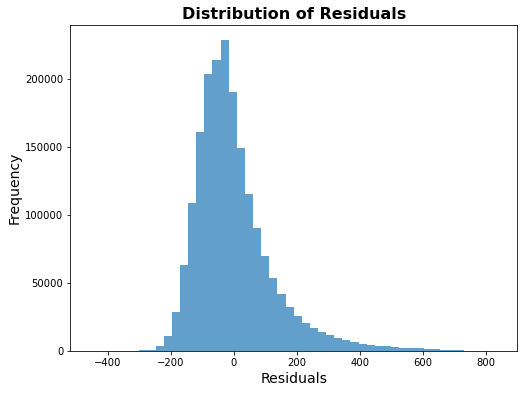

In [76]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

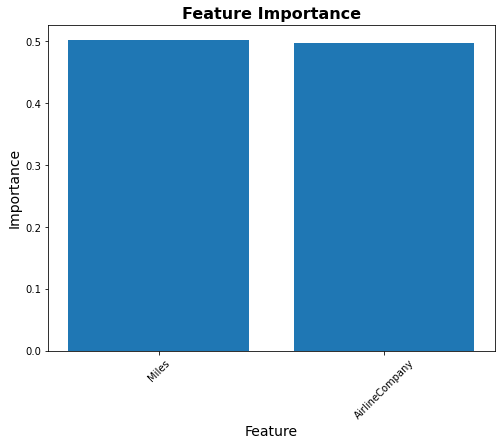

In [77]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [78]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Feature selection and preprocessing
X = df[['Miles', 'AirlineCompany']]  # Add more features if available
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])
y = df['PricePerTicket']

# K-Means clustering
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train separate models for each cluster
models = {}
for cluster in range(n_clusters):
    cluster_indices = X_train['Cluster'] == cluster
    X_cluster_train = X_train[cluster_indices].drop(columns=['Cluster'])
    y_cluster_train = y_train[cluster_indices]
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_cluster_train, y_cluster_train)
    models[cluster] = model

# Predict based on clusters
X_test_clusters = X_test.copy()
X_test_clusters['Cluster'] = kmeans.predict(X_test_clusters.drop(columns=['Cluster']))
predictions = []
for i in range(len(X_test)):
    cluster = X_test_clusters.iloc[i]['Cluster']
    model = models[cluster]
    prediction = model.predict([X_test_clusters.iloc[i].drop('Cluster')])
    predictions.append(prediction[0])

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-78-1ab412e48b3c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])
<ipython-input-78-1ab412e48b3c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.fit_predict(X)


Mean Squared Error: 14627.674657698064


In [79]:
X = df[['Miles', 'Quarter', 'Origin', 'Dest', 'ContiguousUSA', 'DestWac', 'AirlineCompany', 'MktCoupons']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])

# K-Means clustering
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train separate models for each cluster
models = {}
for cluster in range(n_clusters):
    cluster_indices = X_train['Cluster'] == cluster
    X_cluster_train = X_train[cluster_indices].drop(columns=['Cluster'])
    y_cluster_train = y_train[cluster_indices]
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_cluster_train, y_cluster_train)
    models[cluster] = model

# Predict based on clusters
X_test_clusters = X_test.copy()
X_test_clusters['Cluster'] = kmeans.predict(X_test_clusters.drop(columns=['Cluster']))
predictions = []
for i in range(len(X_test)):
    cluster = X_test_clusters.iloc[i]['Cluster']
    model = models[cluster]
    prediction = model.predict([X_test_clusters.iloc[i].drop('Cluster')])
    predictions.append(prediction[0])

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-79-8583f5de8f26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-79-8583f5de8f26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
<ipython-input-79-8583f5de8f26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Mean Squared Error: 14438.01112224833


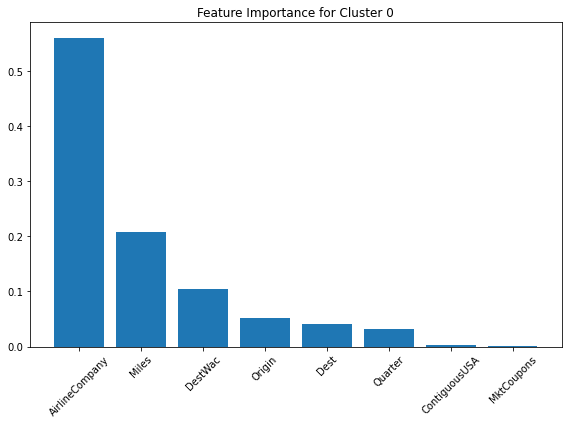

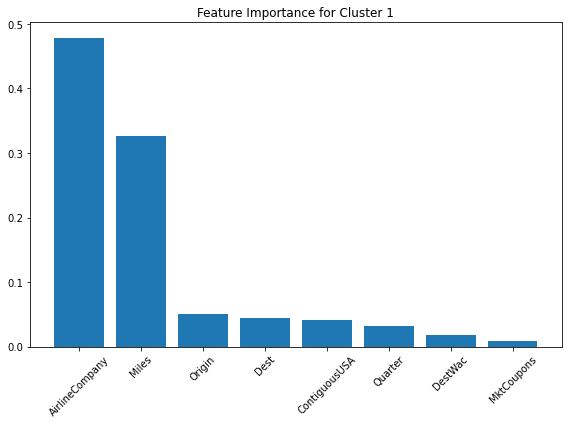

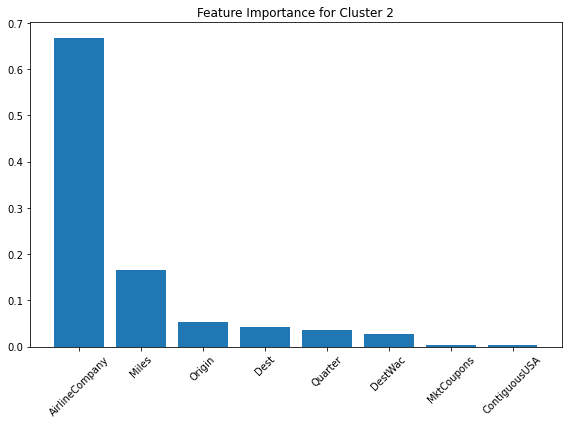

In [80]:
# Plot feature importance for each cluster's Random Forest model
for cluster, model in models.items():
    importances = model.feature_importances_
    feature_names = X_train.drop(columns=['Cluster']).columns
    indices = np.argsort(importances)[::-1]  # Sort by importance

    plt.figure(figsize=(8, 6))
    plt.title(f"Feature Importance for Cluster {cluster}")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
    plt.tight_layout()
    plt.show()

In [81]:

# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns=['Cluster']))

# Add cluster labels
clusters = kmeans.labels_

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(clusters):
    cluster_points = X_pca[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title("K-Means Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'PCA' is not defined

<Figure size 576x432 with 0 Axes>

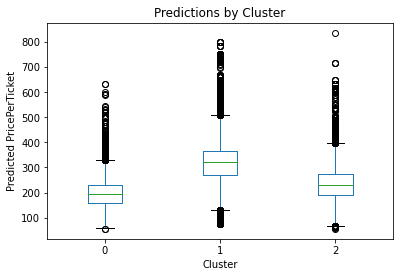

In [82]:
# Add predictions and clusters to the test set
X_test_clusters['Prediction'] = predictions
X_test_clusters['Actual'] = y_test.values

# Boxplot of predictions vs. clusters
plt.figure(figsize=(8, 6))
X_test_clusters.boxplot(column='Prediction', by='Cluster', grid=False)
plt.title("Predictions by Cluster")
plt.suptitle("")  # Remove automatic title
plt.xlabel("Cluster")
plt.ylabel("Predicted PricePerTicket")
plt.show()

# filter based on origin outliers

In [3]:
import pandas as pd

def remove_outliers_by_origin(df, price_column='PricePerTicket', origin_column='Origin'):
    """
    Removes outliers in the price column based on the IQR method, grouped by origin.
    
    Parameters:
    df (pd.DataFrame): Input dataframe.
    price_column (str): Name of the column containing prices.
    origin_column (str): Name of the column containing origins.
    
    Returns:
    pd.DataFrame: DataFrame with outliers removed.
    """
    def filter_group(group):
        # Calculate Q1, Q3, and IQR
        Q1 = group[price_column].quantile(0.25)
        Q3 = group[price_column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers
        return group[(group[price_column] >= lower_bound) & (group[price_column] <= upper_bound)]
    
    # Apply filtering to each group
    filtered_df = df.groupby(origin_column, group_keys=False).apply(filter_group)
    return filtered_df

In [4]:
filtered_df = remove_outliers_by_origin(df, price_column='PricePerTicket', origin_column='Origin')


In [4]:
filtered_df.head()

,Unnamed: 0,ItinID,MktID,MktCoupons,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
676132,676132,201812074564,20181207456403,2,1,ABE,23,PNS,33,963.0,2,1.0,DL,139.0
1130313,1130313,201811390083,20181139008301,1,1,ABE,23,ATL,34,692.0,2,1.0,DL,162.0
1130314,1130314,201811390084,20181139008401,1,1,ABE,23,ATL,34,692.0,2,1.0,DL,214.0
1130315,1130315,201811390085,20181139008501,1,1,ABE,23,ATL,34,692.0,2,1.0,DL,254.0
1130322,1130322,201811390094,20181139009401,1,1,ABE,23,ATL,34,692.0,2,1.0,DL,145.5


# random forest for filtered

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


y = filtered_df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-87-4fd231da5f73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-87-4fd231da5f73>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


Mean Squared Error: 8927.796905073756


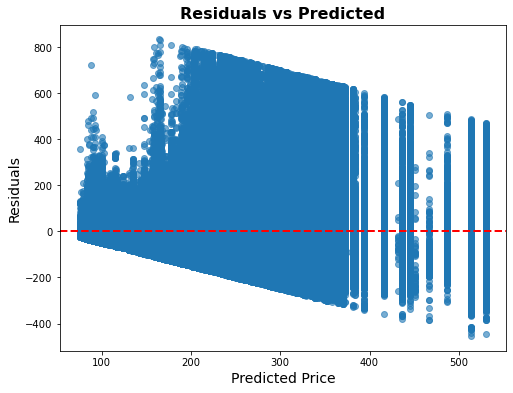

In [89]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

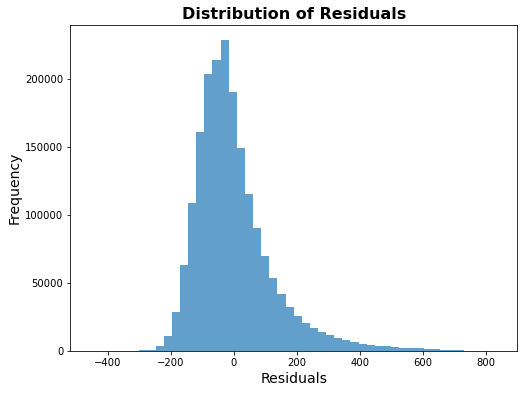

In [90]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

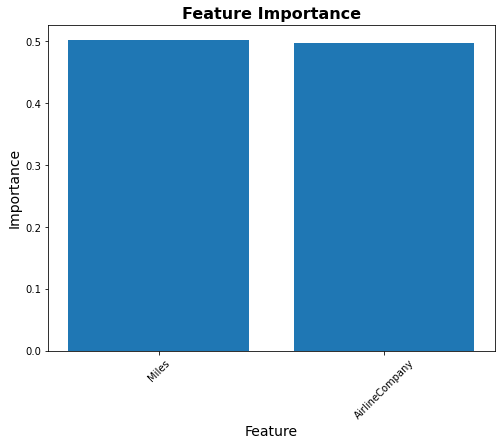

In [91]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [92]:
X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest', 'ContiguousUSA', 'DestWac', 'AirlineCompany', 'MktCoupons']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])

# K-Means clustering
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train separate models for each cluster
models = {}
for cluster in range(n_clusters):
    cluster_indices = X_train['Cluster'] == cluster
    X_cluster_train = X_train[cluster_indices].drop(columns=['Cluster'])
    y_cluster_train = y_train[cluster_indices]
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_cluster_train, y_cluster_train)
    models[cluster] = model

# Predict based on clusters
X_test_clusters = X_test.copy()
X_test_clusters['Cluster'] = kmeans.predict(X_test_clusters.drop(columns=['Cluster']))
predictions = []
for i in range(len(X_test)):
    cluster = X_test_clusters.iloc[i]['Cluster']
    model = models[cluster]
    prediction = model.predict([X_test_clusters.iloc[i].drop('Cluster')])
    predictions.append(prediction[0])

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-92-6f167ed6af3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-92-6f167ed6af3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
<ipython-input-92-6f167ed6af3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

ValueError: Found input variables with inconsistent numbers of samples: [9101945, 9534417]

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Feature selection and preprocessing
X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest', 'ContiguousUSA', 'DestWac', 'AirlineCompany', 'MktCoupons']]
y = filtered_df['PricePerTicket']  # Ensure 'Price' aligns with filtered_df

# Ensure alignment between X and y
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Encoding categorical features
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])

# K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train separate models for each cluster
models = {}
for cluster in range(n_clusters):
    cluster_indices = X_train['Cluster'] == cluster
    X_cluster_train = X_train[cluster_indices].drop(columns=['Cluster'])
    y_cluster_train = y_train[cluster_indices]
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_cluster_train, y_cluster_train)
    models[cluster] = model

# Predict based on clusters
X_test_clusters = X_test.copy()
X_test_clusters['Cluster'] = kmeans.predict(X_test_clusters.drop(columns=['Cluster']))
predictions = []
for i in range(len(X_test)):
    cluster = X_test_clusters.iloc[i]['Cluster']
    model = models[cluster]
    prediction = model.predict([X_test_clusters.iloc[i].drop('Cluster')])
    predictions.append(prediction[0])

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

Mean Squared Error: 8060.093577357482


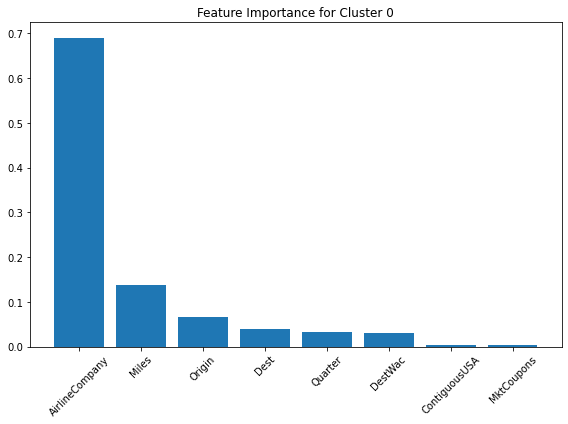

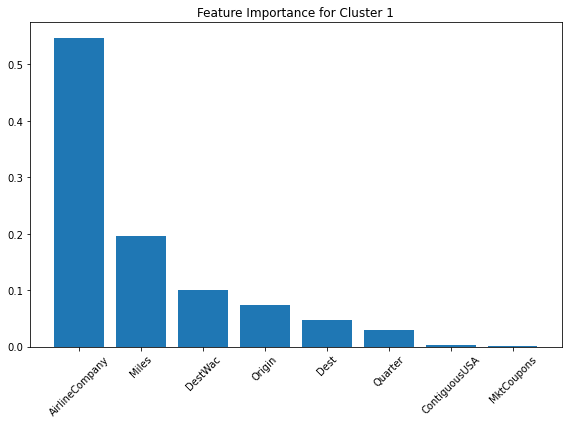

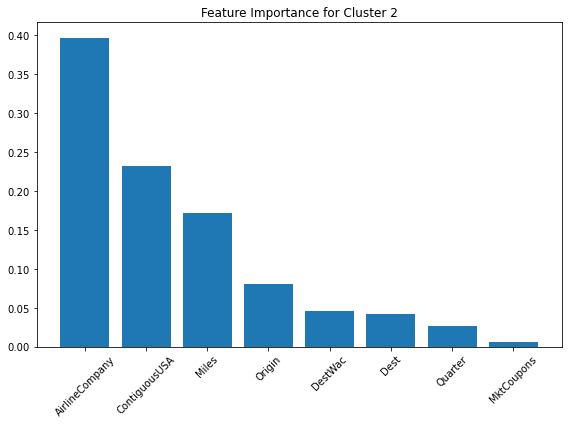

In [96]:
# Plot feature importance for each cluster's Random Forest model
for cluster, model in models.items():
    importances = model.feature_importances_
    feature_names = X_train.drop(columns=['Cluster']).columns
    indices = np.argsort(importances)[::-1]  # Sort by importance

    plt.figure(figsize=(8, 6))
    plt.title(f"Feature Importance for Cluster {cluster}")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 576x432 with 0 Axes>

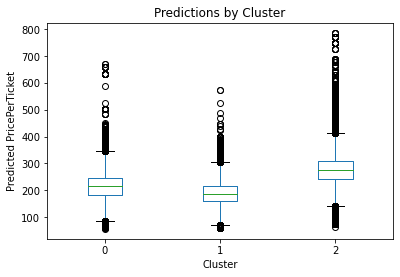

In [97]:
# Add predictions and clusters to the test set
X_test_clusters['Prediction'] = predictions
X_test_clusters['Actual'] = y_test.values

# Boxplot of predictions vs. clusters
plt.figure(figsize=(8, 6))
X_test_clusters.boxplot(column='Prediction', by='Cluster', grid=False)
plt.title("Predictions by Cluster")
plt.suptitle("")  # Remove automatic title
plt.xlabel("Cluster")
plt.ylabel("Predicted PricePerTicket")
plt.show()

# 4 clusters

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Feature selection and preprocessing
X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest', 'ContiguousUSA', 'DestWac', 'AirlineCompany', 'MktCoupons']]
y = filtered_df['PricePerTicket']  # Ensure 'Price' aligns with filtered_df

# Ensure alignment between X and y
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Encoding categorical features
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])

# K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train separate models for each cluster
models = {}
for cluster in range(n_clusters):
    cluster_indices = X_train['Cluster'] == cluster
    X_cluster_train = X_train[cluster_indices].drop(columns=['Cluster'])
    y_cluster_train = y_train[cluster_indices]
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_cluster_train, y_cluster_train)
    models[cluster] = model

# Predict based on clusters
X_test_clusters = X_test.copy()
X_test_clusters['Cluster'] = kmeans.predict(X_test_clusters.drop(columns=['Cluster']))
predictions = []
for i in range(len(X_test)):
    cluster = X_test_clusters.iloc[i]['Cluster']
    model = models[cluster]
    prediction = model.predict([X_test_clusters.iloc[i].drop('Cluster')])
    predictions.append(prediction[0])

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("Root mean Squared Error:", np.sqrt(mean_squared_error(y_test, predictions)))

Mean Squared Error: 8060.129418925787
Root mean Squared Error: 89.77822352288882


# hyperparameter tuning

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

KeyboardInterrupt: 

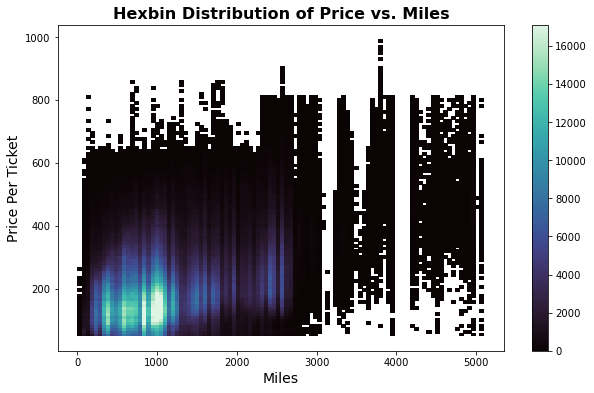

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='Miles', y='PricePerTicket', bins=100, pmax=0.95, cmap='mako', cbar=True, vmin=0)
plt.title('Hexbin Distribution of Price vs. Miles', fontsize=16, fontweight='bold')
plt.xlabel('Miles', fontsize=14)
plt.ylabel('Price Per Ticket', fontsize=14)
plt.show()

In [22]:

import plotly.express as px
import pandas as pd
import json

# Load GeoJSON file for U.S. states
geojson_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
with open(geojson_url) as f:
    geojson = json.load(f)

# Example flight data
flight_data = {
    "State": ["Texas", "California", "New York", "Florida"],
    "OriginCount": [500, 600, 700, 800],
    "DestCount": [450, 550, 650, 750],
}
df = pd.DataFrame(flight_data)

# Plot origins
fig = px.choropleth(
    df,
    geojson=geojson,
    locations="State",
    featureidkey="properties.name",  # Match GeoJSON state names
    color="OriginCount",
    color_continuous_scale="Oranges",
    title="Number of Flights by Origin State",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

# Plot destinations
fig = px.choropleth(
    df,
    geojson=geojson,
    locations="State",
    featureidkey="properties.name",
    color="DestCount",
    color_continuous_scale="Blues",
    title="Number of Flights by Destination State",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

OSError: [Errno 22] Invalid argument: 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'

In [5]:
filtered_df['LogPrice'] = np.log1p(filtered_df['PricePerTicket'])

# random forest log

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


y = filtered_df['LogPrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-121-1ecdbe9840d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-121-1ecdbe9840d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


Mean Squared Error: 0.19916507554488655


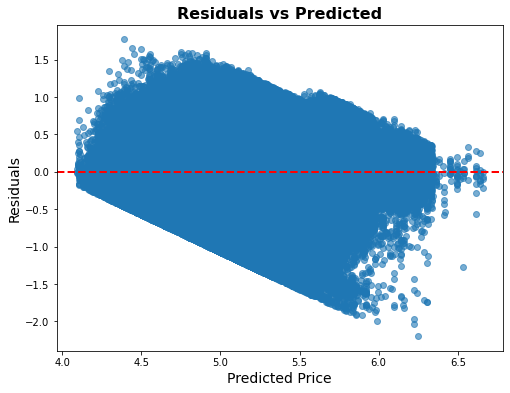

In [122]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

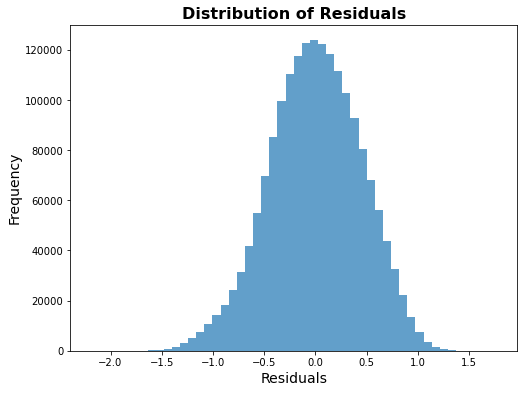

In [123]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

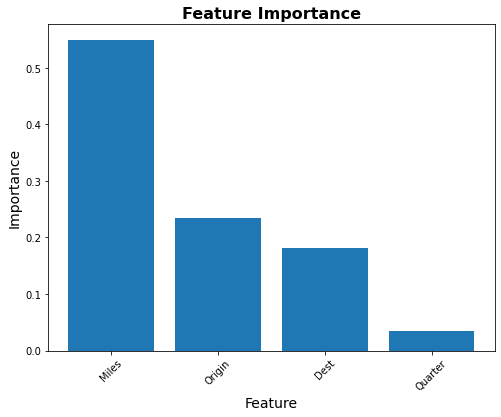

In [124]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest', 'AirlineCompany']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


y = filtered_df['LogPrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-125-d26455281278>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-125-d26455281278>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
<ipython-input-125-d26455281278>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Mean Squared Error: 0.17055229699106053


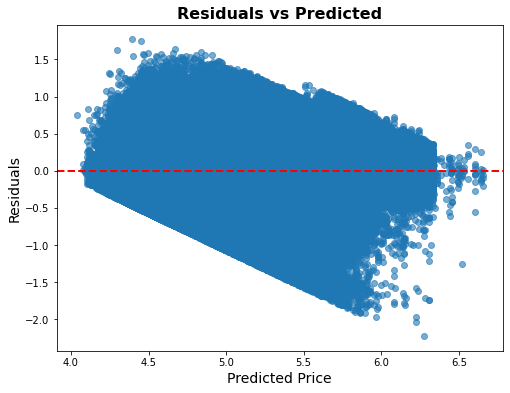

In [126]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

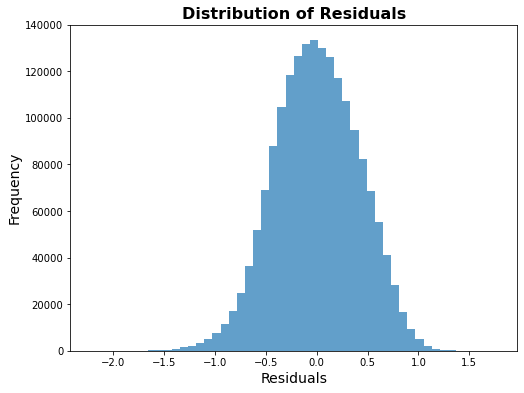

In [127]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

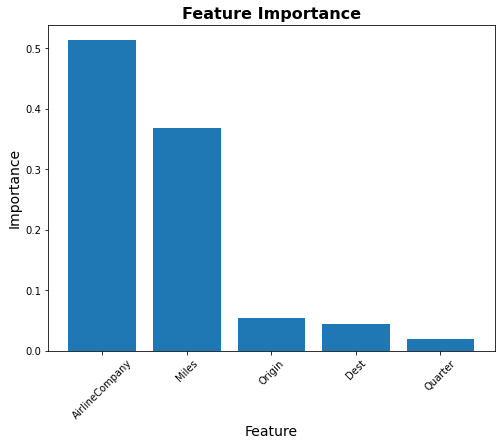

In [128]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest', 'AirlineCompany', 'NumTicketsOrdered']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


y = filtered_df['LogPrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-129-0a83197fb604>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-129-0a83197fb604>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
<ipython-input-129-0a83197fb604>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Mean Squared Error: 0.16640848009425238


In [14]:
X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest', 'AirlineCompany', 'NumTicketsOrdered', 'MktCoupons']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


y = filtered_df['LogPrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-14-5232bc594e23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-14-5232bc594e23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
<ipython-input-14-5232bc594e23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Mean Squared Error: 0.16640797344179015


In [18]:
# Given data for log-transformed MSE
log_transformed_mse = mean_squared_error(y_test, predictions)  # MSE in the log-transformed space

# Convert MSE from log-transformed space to original price scale
# Since MSE in log space represents squared differences, the root mean squared error (RMSE) in log space can be back-transformed
log_transformed_rmse = np.sqrt(log_transformed_mse)

# Approximate the RMSE in the original price scale
approx_price_rmse = np.exp(np.log(filtered_df['PricePerTicket'].mean()) + log_transformed_rmse) - filtered_df['PricePerTicket'].mean()

print('The approximate RMSE in the price prediction is: $', round(approx_price_rmse, 2))

The approximate RMSE in the price prediction is: $ 107.23


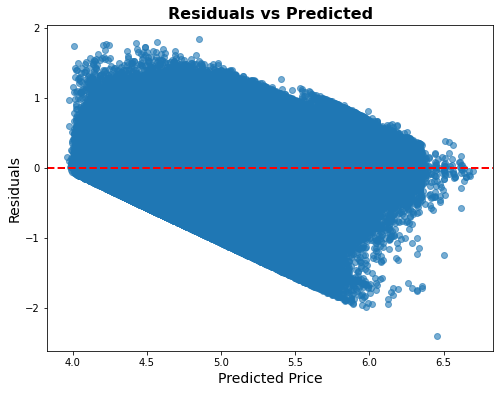

In [130]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

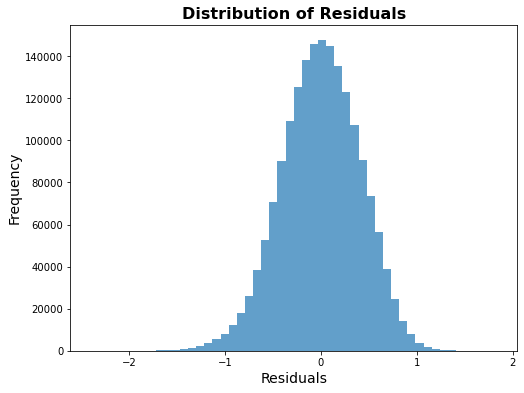

In [131]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

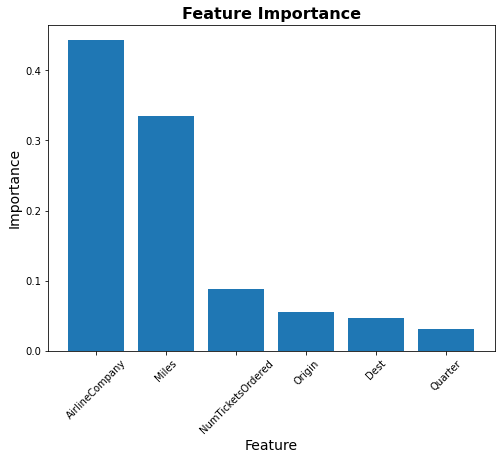

In [132]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()


# xbg

In [133]:
from xgboost import XGBRegressor

# Prepare data
X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
y = filtered_df['LogPrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,    # Number of boosting rounds (trees)
    learning_rate=0.1,   # Step size shrinkage
    max_depth=6,         # Maximum tree depth
    subsample=0.8,       # Fraction of samples used for training each tree
    colsample_bytree=0.8, # Fraction of features used per tree
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Evaluate model
predictions = xgb_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-133-57ea61c78062>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-133-57ea61c78062>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


Mean Squared Error: 0.215273460352972


In [139]:
from sklearn.metrics import accuracy_score
predictions = xgb_model.predict(X_test)  # Ensure this gives class labels, not probabilities
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

ValueError: continuous is not supported

In [137]:
print("Training features:", X_train.shape[1])
print("Test features:", X_test.shape[1])

Training features: 4
Test features: 4


# GLM gamma

In [9]:
import statsmodels.api as sm
from statsmodels.genmod.families import Gaussian, Poisson, Gamma
from sklearn.metrics import r2_score
from statsmodels.genmod.families.links import log


# Prepare data
X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
y = filtered_df['LogPrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# supposedly good to add intercept
X_train_glm = sm.add_constant(X_train)
X_test_glm = sm.add_constant(X_test)

# train with gamma, supposedly best for skewed price data
glm_model = sm.GLM(y_train, X_train_glm, family=Gamma())
glm_results = glm_model.fit()


y_pred_glm = glm_results.predict(X_test_glm)

# eval metrics
mse_glm = mean_squared_error(y_test, y_pred_glm)
r2_glm = r2_score(y_test, y_pred_glm)
print(f"GLM MSE: {mse_glm}")
print(f"GLM R²: {r2_glm}")


print(glm_results.summary())

<ipython-input-9-0a47eca80005>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-9-0a47eca80005>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
C:\Users\tlfd201\AppData\Roaming\Python\Python38\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {ty

GLM MSE: 0.2455248884412988
GLM R²: 0.10194838278411755
                 Generalized Linear Model Regression Results                  
Dep. Variable:               LogPrice   No. Observations:              7281556
Model:                            GLM   Df Residuals:                  7281551
Model Family:                   Gamma   Df Model:                            4
Link Function:           InversePower   Scale:                       0.0090471
Method:                          IRLS   Log-Likelihood:            -5.3082e+06
Date:                Tue, 26 Nov 2024   Deviance:                       67432.
Time:                        10:26:17   Pearson chi2:                 6.59e+04
No. Iterations:                    17   Pseudo R-squ. (CS):             0.1038
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

# gamma log

In [10]:
import statsmodels.api as sm
from statsmodels.genmod.families import Gaussian, Poisson, Gamma
from sklearn.metrics import r2_score
from statsmodels.genmod.families.links import log


# Prepare data
X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
y = filtered_df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# supposedly good to add intercept
X_train_glm = sm.add_constant(X_train)
X_test_glm = sm.add_constant(X_test)

# train with gamma, supposedly best for skewed price data
glm_model = sm.GLM(y_train, X_train_glm, family=Gamma(link=log()))
glm_results = glm_model.fit()


y_pred_glm = glm_results.predict(X_test_glm)

# eval metrics
mse_glm = mean_squared_error(y_test, y_pred_glm)
r2_glm = r2_score(y_test, y_pred_glm)
print(f"GLM MSE: {mse_glm}")
print(f"GLM R²: {r2_glm}")


print(glm_results.summary())

<ipython-input-10-0bfa6aab4531>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-10-0bfa6aab4531>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
C:\Users\tlfd201\AppData\Roaming\Python\Python38\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  

GLM MSE: 10676.450697348904
GLM R²: 0.11022923582755506
                 Generalized Linear Model Regression Results                  
Dep. Variable:         PricePerTicket   No. Observations:              7281556
Model:                            GLM   Df Residuals:                  7281551
Model Family:                   Gamma   Df Model:                            4
Link Function:                    log   Scale:                         0.24087
Method:                          IRLS   Log-Likelihood:            -4.3345e+07
Date:                Tue, 26 Nov 2024   Deviance:                   1.7438e+06
Time:                        10:32:21   Pearson chi2:                 1.75e+06
No. Iterations:                    13   Pseudo R-squ. (CS):             0.1003
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

In [13]:
import statsmodels.api as sm
from statsmodels.genmod.families import Gaussian, Poisson, Gamma
from sklearn.metrics import r2_score
from statsmodels.genmod.families.links import log


# Prepare data
X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest', 'ContiguousUSA', 'AirlineCompany', 'MktCoupons']]
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])

y = filtered_df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# supposedly good to add intercept
X_train_glm = sm.add_constant(X_train)
X_test_glm = sm.add_constant(X_test)

# train with gamma, supposedly best for skewed price data
glm_model = sm.GLM(y_train, X_train_glm, family=Gamma(link=log()))
glm_results = glm_model.fit()


y_pred_glm = glm_results.predict(X_test_glm)

# eval metrics
mse_glm = mean_squared_error(y_test, y_pred_glm)
r2_glm = r2_score(y_test, y_pred_glm)
print(f"GLM MSE: {mse_glm}")
print(f"GLM R²: {r2_glm}")


print(glm_results.summary())

<ipython-input-13-ef537b62281d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-13-ef537b62281d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
<ipython-input-13-ef537b62281d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

GLM MSE: 10540.882672341608
GLM R²: 0.1215274161524118
                 Generalized Linear Model Regression Results                  
Dep. Variable:         PricePerTicket   No. Observations:              7281556
Model:                            GLM   Df Residuals:                  7281548
Model Family:                   Gamma   Df Model:                            7
Link Function:                    log   Scale:                         0.23652
Method:                          IRLS   Log-Likelihood:            -4.3298e+07
Date:                Tue, 26 Nov 2024   Deviance:                   1.7229e+06
Time:                        10:38:58   Pearson chi2:                 1.72e+06
No. Iterations:                    13   Pseudo R-squ. (CS):             0.1129
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

# cluster log

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Feature selection and preprocessing
X = filtered_df[['Miles', 'Quarter', 'Origin', 'Dest', 'ContiguousUSA', 'DestWac', 'AirlineCompany', 'MktCoupons']]
y = filtered_df['LogPrice']  # Ensure 'Price' aligns with filtered_df

# Ensure alignment between X and y
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Encoding categorical features
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])

# K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train separate models for each cluster
models = {}
for cluster in range(n_clusters):
    cluster_indices = X_train['Cluster'] == cluster
    X_cluster_train = X_train[cluster_indices].drop(columns=['Cluster'])
    y_cluster_train = y_train[cluster_indices]
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_cluster_train, y_cluster_train)
    models[cluster] = model

# Predict based on clusters
X_test_clusters = X_test.copy()
X_test_clusters['Cluster'] = kmeans.predict(X_test_clusters.drop(columns=['Cluster']))
predictions = []
for i in range(len(X_test)):
    cluster = X_test_clusters.iloc[i]['Cluster']
    model = models[cluster]
    prediction = model.predict([X_test_clusters.iloc[i].drop('Cluster')])
    predictions.append(prediction[0])

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

KeyboardInterrupt: 

<AxesSubplot:xlabel='Quarter', ylabel='PricePerTicket'>

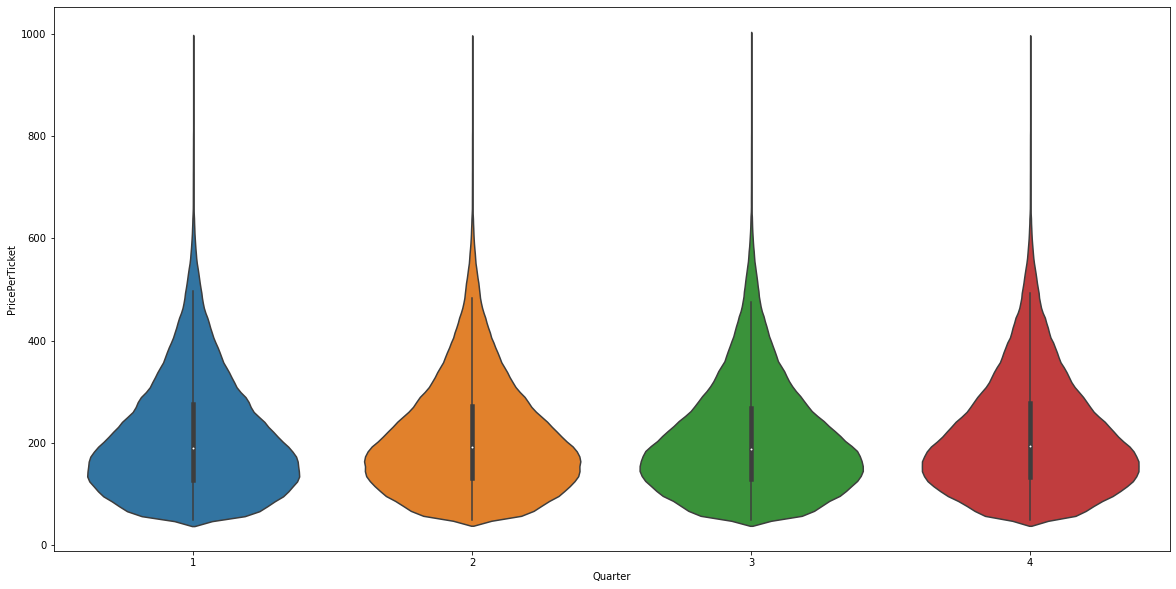

In [99]:
plt.figure(figsize=(20, 10))

sns.violinplot(x ="Quarter", 
             y ="PricePerTicket", 
             data = filtered_df)

In [115]:
print('original Q1', (df[df['Quarter']==1]['PricePerTicket']).mean())
print('filtered Q1', (filtered_df[filtered_df['Quarter']==1]['PricePerTicket']).mean())
print('original Q2', (df[df['Quarter']==2]['PricePerTicket']).mean())
print('filtered Q2', (filtered_df[filtered_df['Quarter']==2]['PricePerTicket']).mean())
print('original Q3', (df[df['Quarter']==3]['PricePerTicket']).mean())
print('filtered Q3', (filtered_df[filtered_df['Quarter']==3]['PricePerTicket']).mean())
print('original Q4', (df[df['Quarter']==4]['PricePerTicket']).mean())
print('filtered Q4', (filtered_df[filtered_df['Quarter']==4]['PricePerTicket']).mean())
print('original mean ticket price:', df['PricePerTicket'].mean())
print('filtered mean tcket price:', filtered_df['PricePerTicket'].mean())

original Q1 233.24623334309217
filtered Q1 212.68767237408738
original Q2 231.1164230333579
filtered Q2 212.35407352071672
original Q3 228.42860133553953
filtered Q3 209.8805123652574
original Q4 236.66335095209493
filtered Q4 216.24355403347533
original mean ticket price: 232.44973093793837
filtered mean tcket price: 212.8809500376181


<AxesSubplot:xlabel='AirlineCompany', ylabel='PricePerTicket'>

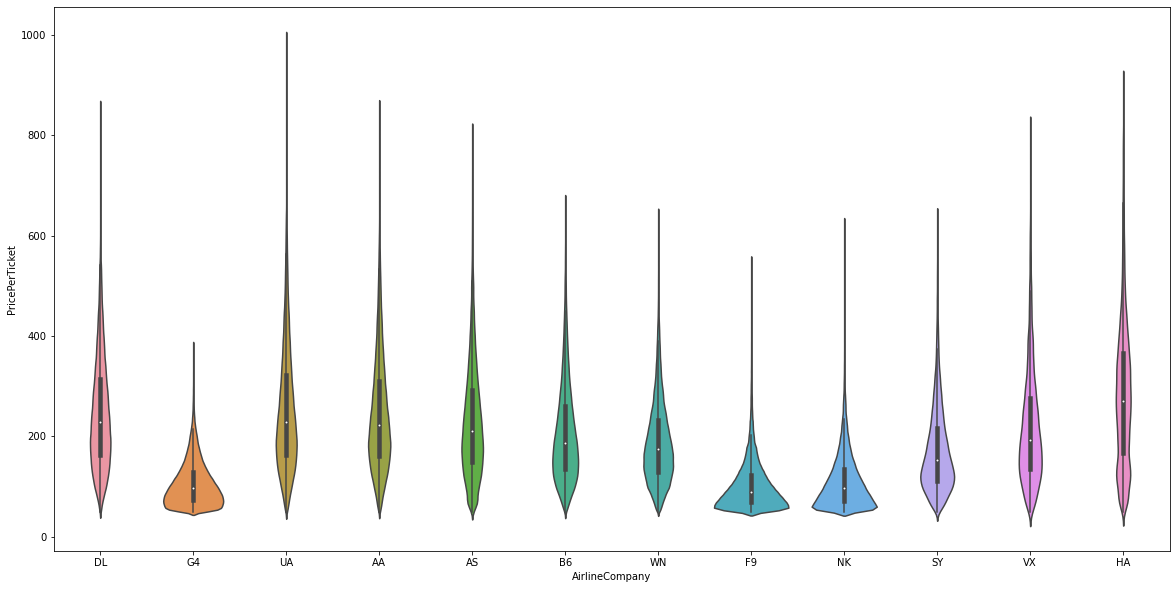

In [100]:
plt.figure(figsize=(20, 10))

sns.violinplot(x ="AirlineCompany", 
             y ="PricePerTicket", 
             data = filtered_df)

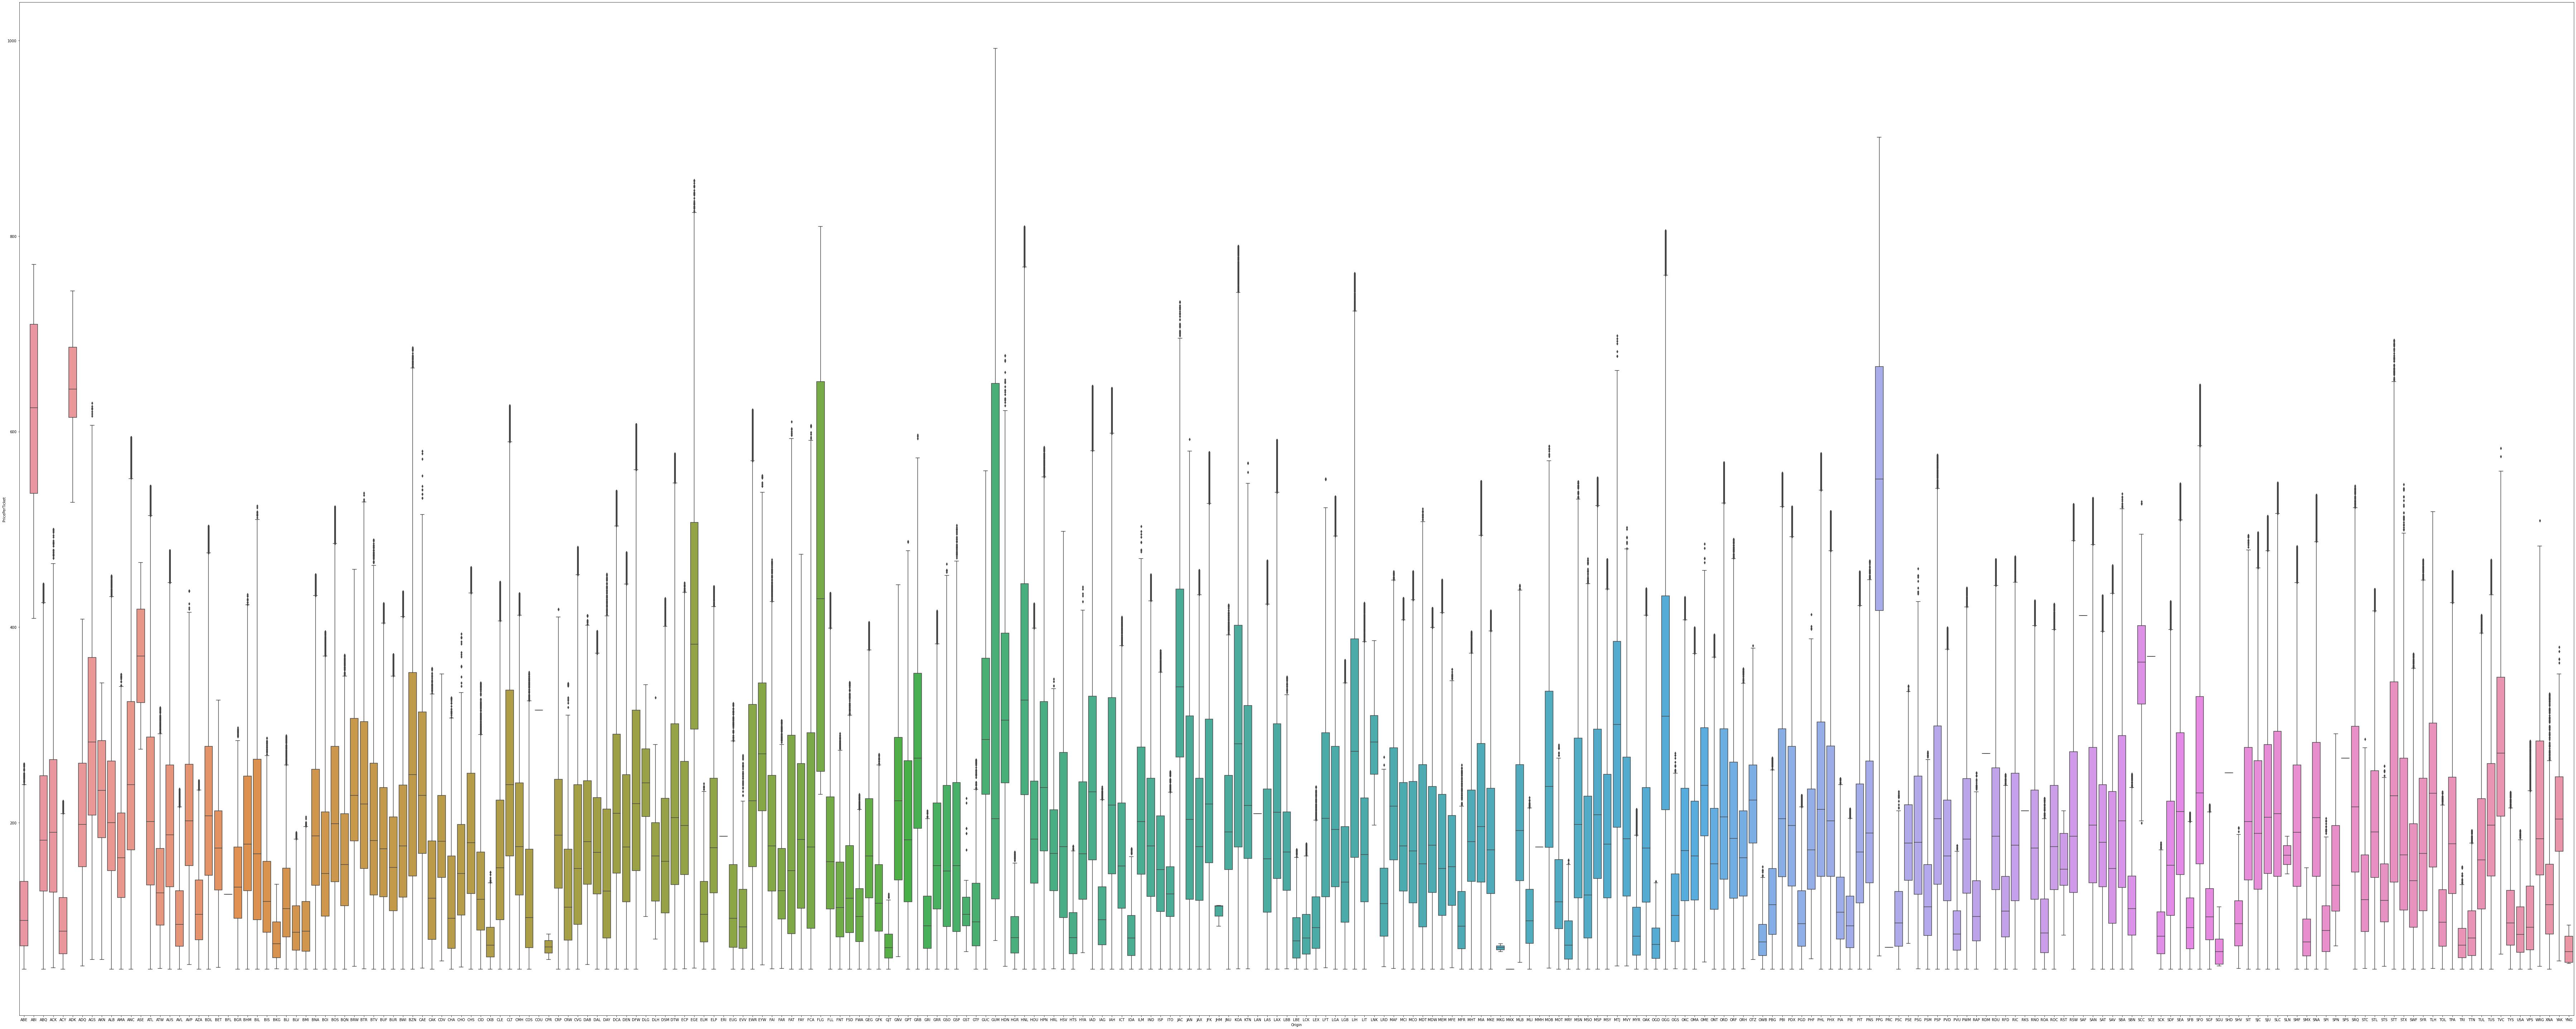

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 40))
ax = sns.boxplot(data=filtered_df, x='Origin', y='PricePerTicket')
plt.tight_layout()
plt.savefig('origin_box_filt', dpi = 400, bbox_inches='tight')
#too much